# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [46]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [28]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

male_summary = male_df.describe()
female_summary = male_df.describe()

print('Male Height mean:', male_df.Height.mean())
print('Male Height sd:', male_df.Height.std())      

print('Male Weight mean:', male_df.Weight.mean())
print('Male Weight sd:' ,male_df.Weight.std())   

print('Female Height mean:', female_df.Height.mean())
print('Female Height sd:' ,female_df.Height.std())      

print('Female Weight mean:', female_df.Weight.mean())
print('Female Weight sd:' ,female_df.Weight.std())   


# print('Male Height Mean: ', male_summary.loc['mean']['Height'])
# print('Male Height std: ', male_summary.loc['std']['Height'])
# print('Male Weight Mean: ', male_summary.loc['mean']['Weight'])
# print('Male Weight std: ', male_summary.loc['std']['Weight'])

# print('Female Height Mean: ', female_summary.loc['mean']['Height'])
# print('Female Height std: ', female_summary.loc['std']['Height'])
# print('Female Weight Mean: ', female_summary.loc['mean']['Weight'])
# print('Female Weight std: ', female_summary.loc['std']['Weight'])

# Male Height mean: 69.02634590621737
# Male Height std: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

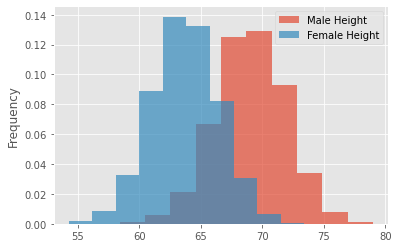

In [33]:
# Your code here
male_df.Height.plot.hist(density=True, alpha=0.7,label="Male Height")
female_df.Height.plot.hist(density=True, alpha=0.7,label="Female Height")

plt.legend()
plt.show()

In [34]:
# Record your observations - are these inline with your personal observations?
"""
Both female and male hight frequencies follow a normal distribution.
Men tend to be taller than women on average, although there is obvious overlap. 
Male height values are most common between ~67 and ~73, while the majority of 
female height values occur between 60 and ~78. Male heights spread across a wider range
resulting in a shorter peak (ironically). 
"""

'\nBoth female and male hight frequencies follow a normal distribution.\nMen tend to be taller than women on average, although there is obvious overlap. \nMale height values are most common between ~67 and ~73, while the majority of \nfemale height values occur between 60 and ~78. Male heights spread across a wider range\nresulting in a shorter peak (ironically). \n'

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

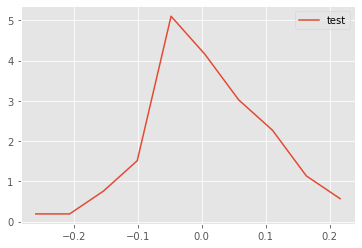

In [36]:
def density(x):
    
    n, bins = np.histogram(x,10,density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
        
    return pdfx, pdfy
    
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add overlapping density plots to the histograms plotted earlier

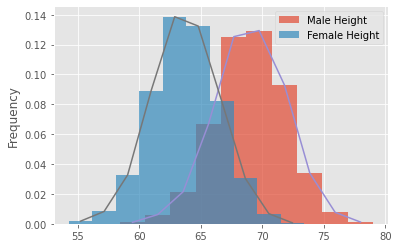

In [40]:
# Your code here 

male_df.Height.plot.hist(density=True, alpha=0.7,label="Male Height")
female_df.Height.plot.hist(density=True, alpha=0.7,label="Female Height")

x,y = density(male_df.Height)
plt.plot(x,y)

x,y = density(female_df.Height)
plt.plot(x,y)

plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

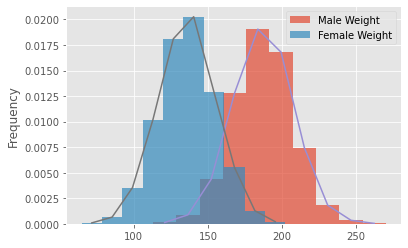

In [41]:
# Your code here 
male_df.Weight.plot.hist(density=True, alpha=0.7,label="Male Weight")
female_df.Weight.plot.hist(density=True, alpha=0.7,label="Female Weight")

x,y = density(male_df.Weight)
plt.plot(x,y)

x,y = density(female_df.Weight)
plt.plot(x,y)

plt.legend()
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?
"""
Both male and females weights follow a normal distribution, however men are on average heavier
that women with the majority of men weighing between ~175 and ~225 pounds while most women weigh
between ~115 and ~175. There is far less overlap with weight then there is with hieght. 
"""

# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

C:\Users\zethu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zethu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


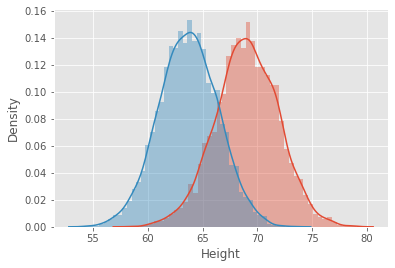

In [52]:
# Code for heights here
males = sns.distplot(male_df.Height)
females = sns.distplot(female_df.Height)

C:\Users\zethu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zethu\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


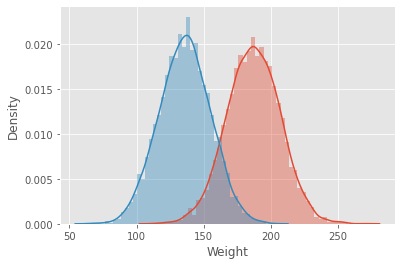

In [53]:
# Code for weights here
males = sns.distplot(male_df.Weight)
females = sns.distplot(female_df.Weight)

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.